In [1]:
import numpy as np
import pandas as pd
import re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import unidecode

C:\Users\debora.assis\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\debora.assis\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\debora.assis\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv('IMDB-Dataset.csv')
print('tamanho do conjunto de dados:', data.shape)
print('quantidade de dados por classe: \n ',data['sentiment'].value_counts())
data.head()

tamanho do conjunto de dados: (50000, 2)
quantidade de dados por classe: 
  positive    25000
negative    25000
Name: sentiment, dtype: int64


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
print('sentimento:', data['sentiment'][2])
print('exemplo:', data['review'][2])

sentimento: positive
exemplo: I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.


# **Transformando textos em dados numéricos**

In [4]:
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(data['review'])

In [5]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(data['review'])
print(bag_of_words.shape)

(50000, 50)


# Análise de sentimentos

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix
)

In [7]:
# Converter rótulos para 0 e 1
label = LabelEncoder()
y_sentiment = label.fit_transform(data['sentiment'])  # Converte 'negative' e 'positive' para 0 e 1


# Divisão dos dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, y_sentiment, random_state=321)

# Modelos a serem treinados
modelos = {
    "Regressão Logística": LogisticRegression(),
#     "KNN": KNeighborsClassifier(),
#     "Random Forest": RandomForestClassifier(),
#     "SVM": SVC(probability=True),
#     "MLP": MLPClassifier(max_iter=500),
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# Função para calcular métricas
def calcular_metricas(y_true, y_pred, y_probs):
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred, average="binary")
    recall = recall_score(y_true, y_pred, average="binary")
    f1 = f1_score(y_true, y_pred, average="binary")
    auc = roc_auc_score(y_true, y_probs)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)

    print(f'"accuracy": {accuracy:.4f}, "precision": {precision:.4f}, "recall": {recall:.4f}, "specificity": {specificity:.4f}, "f1": {f1:.4f}, "auc": {auc:.4f}')
    return 

def classificacao_texto(X_treino, y_treino, X_teste, y_teste):
    # Treinar e avaliar os modelos
    for nome, modelo in modelos.items():
        modelo.fit(X_treino, y_treino)
        y_pred = modelo.predict(X_teste)
        y_probs = modelo.predict_proba(X_teste)[:, 1] if hasattr(modelo, "predict_proba") else y_pred  # Alguns modelos não têm `predict_proba`

        print(f"Métricas para {nome}:")
        metrics = calcular_metricas(y_teste, y_pred, y_probs)
    
classificacao_texto(X_treino, y_treino, X_teste, y_teste)

Métricas para Regressão Logística:
"accuracy": 65.2720, "precision": 0.6491, "recall": 0.6678, "specificity": 0.6375, "f1": 0.6583, "auc": 0.7082


# Visualização das palavras mais frequentes

In [8]:
from wordcloud import WordCloud

In [9]:
# frequencia das palavras em casa avaliação
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
matriz_esparsa

,It,The,This,about,all,an,and,are,as,at,...,the,they,this,to,up,very,was,who,with,you
0,2,2,1,1,1,1,6,2,4,0,...,14,0,2,6,0,0,3,2,5,3
1,1,3,0,1,2,0,7,2,0,0,...,13,0,0,2,0,2,0,0,3,0
2,0,1,2,0,0,0,4,1,0,1,...,7,1,3,4,0,0,4,0,2,0
3,0,0,1,0,3,0,3,2,0,0,...,6,0,0,3,0,0,0,0,3,2
4,0,2,2,2,2,0,5,1,1,0,...,18,1,0,7,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,0,1,1,0,7,0,2,0,...,5,0,5,5,0,1,2,2,0,2
49996,1,3,0,0,1,0,2,0,0,0,...,6,0,1,3,0,0,4,1,0,1
49997,0,0,1,0,1,1,6,1,2,0,...,21,0,2,4,0,1,1,1,1,0
49998,1,0,1,2,1,0,8,2,3,0,...,13,2,2,6,0,0,2,0,3,1


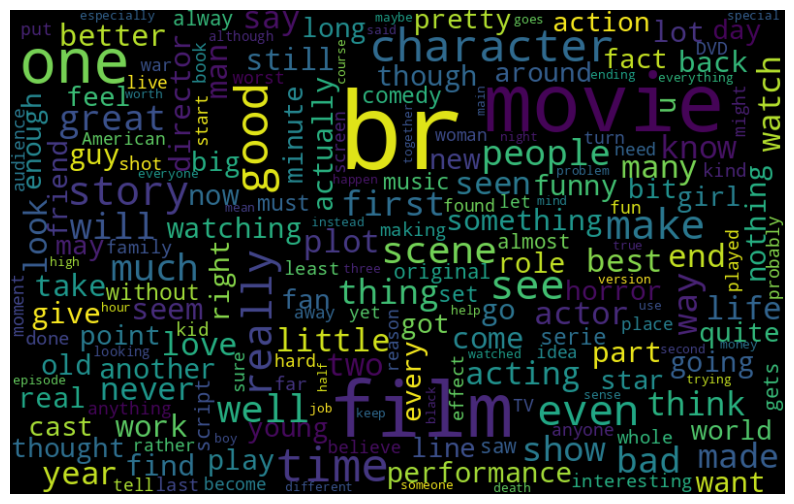

In [10]:
todas_palavras = ' '.join([texto for texto in data['review']])

nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
data.query(f"sentiment == 'negative'")

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
49994,This is your typical junk comedy.<br /><br />T...,negative
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [12]:
def nuvem_palavras(data, coluna_texto, sentimento):
    # Filtrando com base no sentimento especificado
    texto_sentimento = data.query(f"sentiment == '{sentimento}'")[coluna_texto]

    # Unindo todas as resenhas em uma única string
    texto_unido = ' '.join(texto_sentimento)

    # Criando e exibindo a nuvem de palavras
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto_unido)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

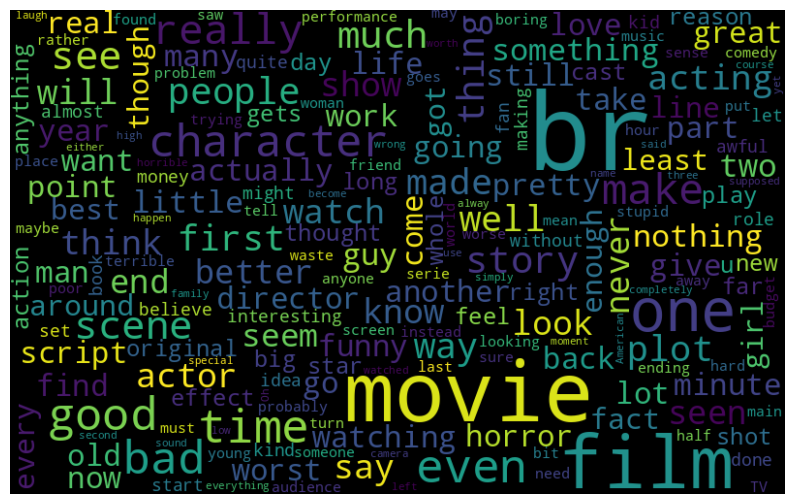

In [13]:
nuvem_palavras(data, 'review', 'negative')

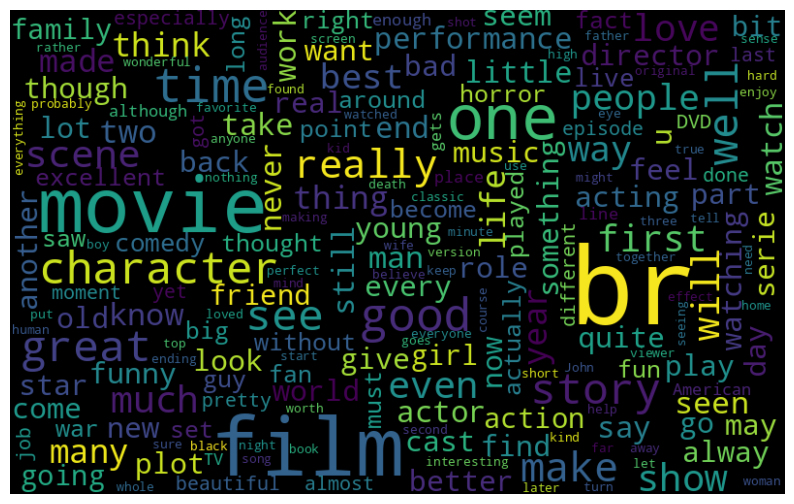

In [14]:
nuvem_palavras(data, 'review', 'positive')

# Frequência das palavras

In [15]:
import nltk
from nltk import tokenize
import seaborn as sns

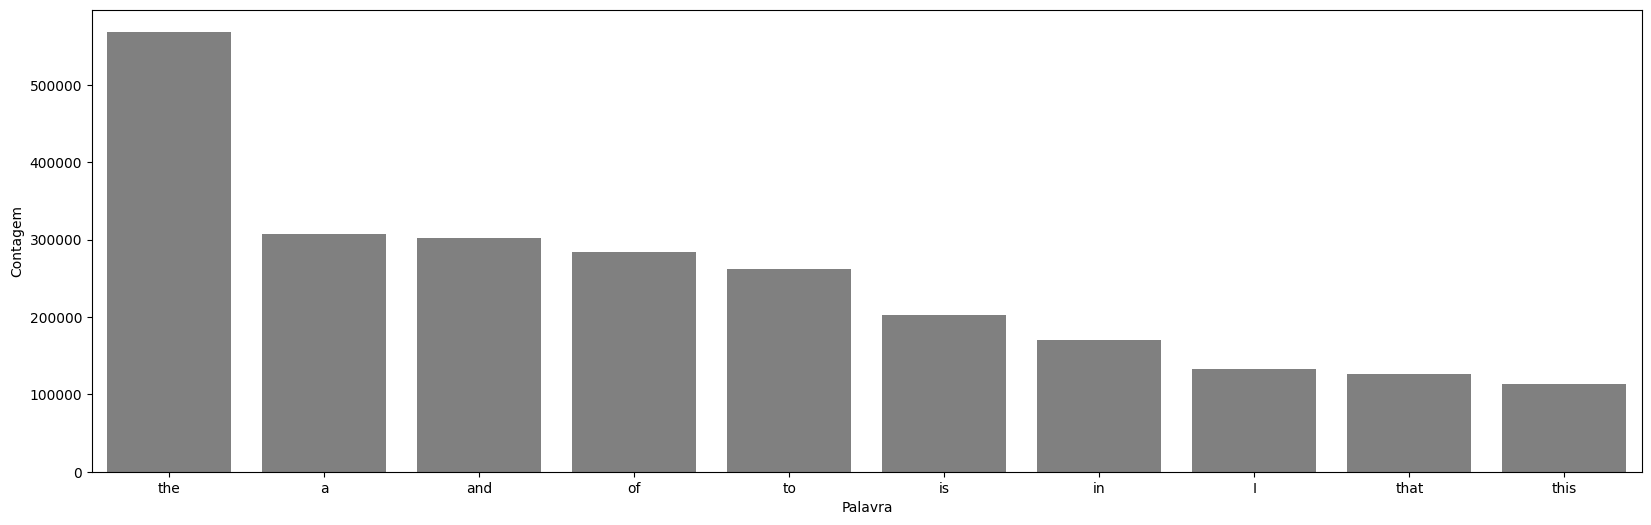

In [16]:
def grafico_frequencia(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_espaco = tokenize.WhitespaceTokenizer()
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                 "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns="Frequência", n=quantidade)
    plt.figure(figsize=(20,6))
    ax = sns.barplot(data=df_frequencia, x="Palavra", y ="Frequência", color='gray')
    ax.set(ylabel="Contagem")
    plt.show()
    
grafico_frequencia(data, 'review', 10)

In [17]:
frase_processada = []
token_pontuacao = tokenize.WordPunctTokenizer()
palavras_irrelevantes = nltk.corpus.stopwords.words('english')

for opiniao in data['review']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra.isalpha() and palavra not in palavras_irrelevantes]
    frase_processada.append(' '.join(nova_frase))

data['review_processada'] = frase_processada

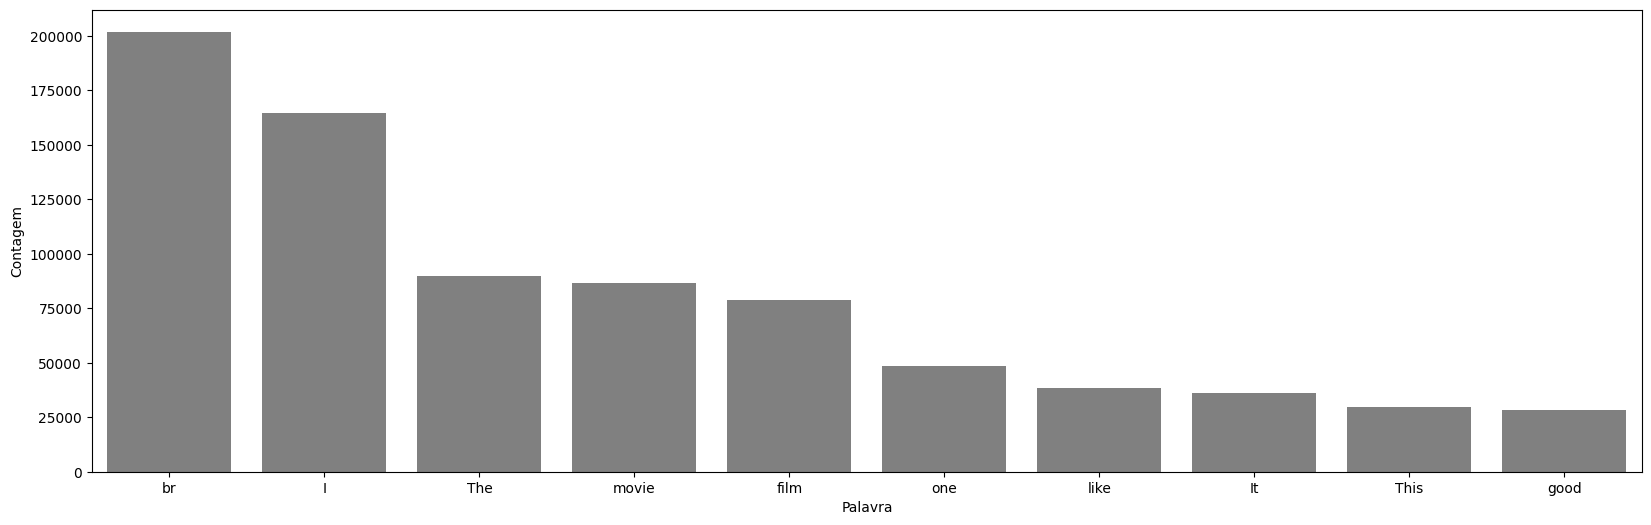

In [18]:
grafico_frequencia(data, 'review_processada', 10)

# Aplicando pré-processamento de texto

In [19]:
# Stemização
stemmer = nltk.RSLPStemmer()

frase_stem = []

for opiniao in data['review']:
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [stemmer.stem(palavra) for palavra in palavras_texto]
    frase_stem.append(' '.join(nova_frase))

data['review_processada'] = frase_stem

In [20]:
bag_of_words_process = vetorizar.fit_transform(data['review_processada'])

# Divisão dos dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, y_sentiment, random_state=321)
classificacao_texto(X_treino, y_treino, X_teste, y_teste)

Métricas para Regressão Logística:
"accuracy": 65.2720, "precision": 0.6491, "recall": 0.6678, "specificity": 0.6375, "f1": 0.6583, "auc": 0.7082


# Importância das palavras

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

# dados completos sem processamentos
tfidf_bruto = tfidf.fit_transform(data["review"])
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_bruto, y_sentiment, random_state=321)
classificacao_texto(X_treino, y_treino, X_teste, y_teste)

Métricas para Regressão Logística:
"accuracy": 65.3760, "precision": 0.6522, "recall": 0.6618, "specificity": 0.6457, "f1": 0.6569, "auc": 0.7059


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# dados processados com stemização
tfidf_process = tfidf.fit_transform(data["review_processada"])
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_process, y_sentiment, random_state=321)
classificacao_texto(X_treino, y_treino, X_teste, y_teste)

Métricas para Regressão Logística:
"accuracy": 65.1600, "precision": 0.6496, "recall": 0.6611, "specificity": 0.6420, "f1": 0.6553, "auc": 0.7038


# Contexto usando n-grams

In [23]:
from nltk import ngrams

In [24]:
tfidf_50 = TfidfVectorizer(lowercase=False, max_features=50, ngram_range=(1,2))
vetor_tfidf = tfidf_50.fit_transform(data["review_processada"])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, y_sentiment, random_state=321)
classificacao_texto(X_treino, y_treino, X_teste, y_teste)

Métricas para Regressão Logística:
"accuracy": 65.0400, "precision": 0.6505, "recall": 0.6528, "specificity": 0.6480, "f1": 0.6517, "auc": 0.7049


In [25]:
tfidf_100 = TfidfVectorizer(lowercase=False, max_features=100, ngram_range=(1,2))
vetor_tfidf = tfidf_100.fit_transform(data["review_processada"])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, y_sentiment, random_state=321)
classificacao_texto(X_treino, y_treino, X_teste, y_teste)

Métricas para Regressão Logística:
"accuracy": 73.5840, "precision": 0.7312, "recall": 0.7474, "specificity": 0.7243, "f1": 0.7392, "auc": 0.8116


In [26]:
tfidf_500 = TfidfVectorizer(lowercase=False, max_features=500, ngram_range=(1,2))
vetor_tfidf = tfidf_500.fit_transform(data["review_processada"])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, y_sentiment, random_state=321)
classificacao_texto(X_treino, y_treino, X_teste, y_teste)

Métricas para Regressão Logística:
"accuracy": 82.2720, "precision": 0.8164, "recall": 0.8336, "specificity": 0.8118, "f1": 0.8249, "auc": 0.9048


In [27]:
tfidf_1000 = TfidfVectorizer(lowercase=False, max_features=1000, ngram_range=(1,2))
vetor_tfidf = tfidf_1000.fit_transform(data["review_processada"])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, y_sentiment, random_state=321)
classificacao_texto(X_treino, y_treino, X_teste, y_teste)

Métricas para Regressão Logística:
"accuracy": 85.8640, "precision": 0.8530, "recall": 0.8673, "specificity": 0.8500, "f1": 0.8601, "auc": 0.9346


In [28]:
tfidf_ = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
vetor_tfidf = tfidf_.fit_transform(data["review_processada"])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, y_sentiment, random_state=321)
classificacao_texto(X_treino, y_treino, X_teste, y_teste)

Métricas para Regressão Logística:
"accuracy": 89.7600, "precision": 0.8902, "recall": 0.9075, "specificity": 0.8876, "f1": 0.8988, "auc": 0.9624


In [29]:
regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo com todas as features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index=tfidf_.get_feature_names_out()
)
pesos.nlargest(10, 0)

Acurácia do modelo com todas as features e ngrams: 89.76%


,0
great,9.889370
excellent,6.693685
and,5.166839
wonderful,5.124163
perfect,4.965121
best,4.891598
lov,4.739214
the best,4.683195
amazing,4.363738
today,4.109923


In [30]:
token_pontuacao = tokenize.WordPunctTokenizer()
stemmer = nltk.RSLPStemmer()


def processar_avaliacao(avaliacao):
    # tokenização
    tokens = token_pontuacao.tokenize(avaliacao)

    # remoção de stopwords
    frase_processada = [palavra for palavra in tokens if palavra.lower() not in palavras_irrelevantes]

    # passo 3
    frase_processada = [palavra for palavra in frase_processada if palavra.isalpha()]

    # remoção de acentos
    frase_processada = [unidecode.unidecode(palavra) for palavra in frase_processada]

    # stemização
    frase_processada = [stemmer.stem(palavra) for palavra in frase_processada]

    return ' '.join(frase_processada)

In [31]:
avaliacoes_processadas = [processar_avaliacao(avaliacao) for avaliacao in data['review']]

In [32]:
avaliacoes_tfidf = tfidf.fit_transform(avaliacoes_processadas)
X_treino, X_teste, y_treino, y_teste = train_test_split(avaliacoes_tfidf, y_sentiment, random_state=321)
classificacao_texto(X_treino, y_treino, X_teste, y_teste)

Métricas para Regressão Logística:
"accuracy": 71.2960, "precision": 0.7126, "recall": 0.7157, "specificity": 0.7102, "f1": 0.7141, "auc": 0.7838
